# Data Engineer - Cleaning  & Encoding
**This handles the preprocessing for the UNSW-NB15 dataset.**

**Task completed:**
- Merges all dataset parts into one DataFrame
- Drops duplicates and handles missing values
- Encodes categorical feautures using One-Hot Encoding
- Saves the cleaned dataset as "unsw_cleaned.csv"
- Visualizes the label distribution

# Step 1: Import required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Step 2: Load and Merge Dataset Parts

In [38]:
# Load all csv files 
files = ['UNSW-NB15_1.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_3.csv', 'UNSW-NB15_4.csv']

# Read and concatenate
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)
print("Merged dataset shape:", df.shape)



/var/folders/g1/zpxsb4cx1k98nwpj_v6_x7x00000gn/T/ipykernel_31381/139481131.py:5: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in files]
/var/folders/g1/zpxsb4cx1k98nwpj_v6_x7x00000gn/T/ipykernel_31381/139481131.py:5: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in files]


Merged dataset shape: (2540043, 139)


# Step 3: Drop duplicates and Handle Missing Values 

In [39]:
# Drop duplicate rows
df = df.drop_duplicates()

# Replace missing values
df = df.fillna(0)  

print("After cleaning:", df.shape)


After cleaning: (2059418, 139)


# Step 4: Encode Categorical Columns

In [49]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

print("After label encoding categorical columns:", df.shape)


After label encoding categorical columns: (2059418, 139)


# Step 5: Save the Preprocessed Dataset

In [50]:
#Save full cleaned dataset 
df.to_csv('UNSW-NB15_full.csv', index=False)


# Smaller Sample
sample_df = df.sample(1000, random_state=42)
sample_df.to_csv('UNSW-NB15_sample_1k.csv', index=False)
print("Full and sample datasets saved to each csv.")


Full and sample datasets saved to each csv.


# Step 6: Visualize Label Distribution

Using '4' as the label column.


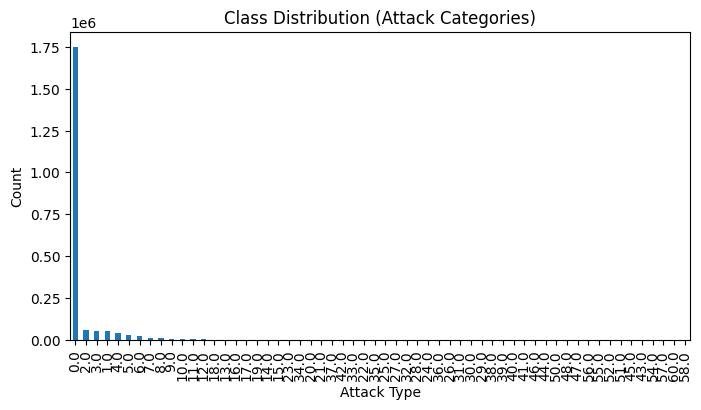

In [5]:
df = pd.read_csv('UNSW-NB15_full.csv')

# Use the last column as the label
label_column = df.columns[-1]  

print(f"Using '{label_column}' as the label column.")

# Plot the distribution
plt.figure(figsize=(8, 4))
df[label_column].value_counts().plot(kind='bar')
plt.title('Class Distribution (Attack Categories)')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()